In [72]:
#import necessary libraries
import tensorflow as tf #tensorflow for mathematical calculation
from tensorflow import keras #keras work as backend of tensorflow
import matplotlib.pyplot as plt #for plotting the digit
import numpy as np #for numerical calculation
import pandas as pd
import numpy as np

In [73]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data() #load data

In [74]:
len(X_train) #we have 60000training samples

60000

In [75]:
len(X_test) #we have 10000 testing samples

10000

In [76]:
X_train[0].shape #shape of individual digit 

(28, 28)

In [77]:
X_train[0] #2D representation of digit

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

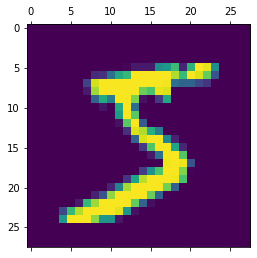

In [78]:
plt.matshow(X_train[0]) #plotting the first training image 

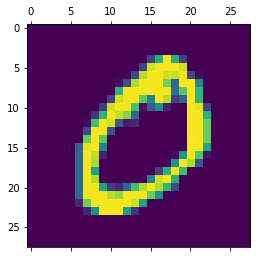

In [79]:
plt.matshow(X_train[1]) 

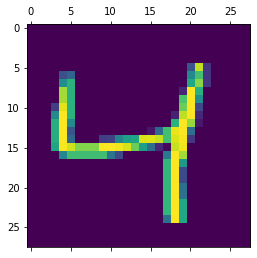

In [80]:
plt.matshow(X_train[2]) 

In [81]:
y_train[2] 

4

In [82]:
y_train[:5] #display first 5 number

array([5, 0, 4, 1, 9], dtype=uint8)

In [83]:
X_train.shape

(60000, 28, 28)

In [84]:
X_train=X_train/255        #scalling improves accuracy of the model
X_test=X_test/255

In [85]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [86]:
#Now we will flatten elements (convert 2D to 1D) using reshape


In [87]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)


In [88]:
X_train_flattened.shape

(60000, 784)

In [89]:
X_test_flattened.shape

(10000, 784)

In [90]:
X_train_flattened[0] #converted into 1D format

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [91]:
#create a simple neural network
# This will have two layers for now, input layer with 784 elements and output layer with 10 elements

In [92]:
model=keras.Sequential([ #sequential will create stack of layerr
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')     #using Dense all input nodes will get connected to every output node
]
)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #sparse means integer no not one hot encoded
              metrics=['accuracy']  
)
model.fit(X_train_flattened,y_train,epochs=5)#here training actually happens

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 2s 998us/step - loss: 0.4691 - accuracy: 0.8769
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3039 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2835 - accuracy: 0.9201
Epoch 4/5

In [93]:
#now test it on the test dataset
model.evaluate(X_test_flattened,y_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 0s 849us/step - loss: 0.2712 - accuracy: 0.9242


[0.27123138308525085, 0.9241999983787537]

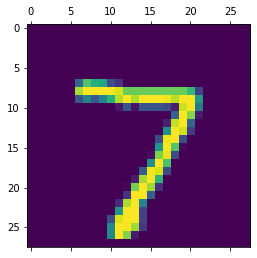

In [94]:
plt.matshow(X_test[0])

In [95]:
#predict the digits using model
y_predicted=model.predict(X_test_flattened) #printing probability of 10 digit
y_predicted[0]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


array([3.03976536e-02, 1.76296808e-07, 7.00872242e-02, 9.47331429e-01,
       2.04995275e-03, 1.04935855e-01, 1.95351049e-06, 9.99695480e-01,
       6.56781793e-02, 7.74078965e-01], dtype=float32)

In [96]:
#Now print index of maximum probability

In [97]:
np.argmax(y_predicted[0]) #the model predicted the digit 7

7

In [98]:
np.argmax(y_predicted[1]) #the model predicted the digit 2

2

In [100]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]


[7, 2, 1, 0, 4]

In [99]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [102]:
#If you want to see how your prediction look like so build confusion matrix
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    4,   10,    2,    1,    0],
       [   0, 1106,    5,    2,    0,    2,    4,    2,   14,    0],
       [   4,    6,  936,   19,    9,    2,   12,    8,   32,    4],
       [   1,    0,   20,  941,    1,   13,    2,   10,   12,   10],
       [   1,    1,    4,    1,  922,    0,   10,    3,    7,   33],
       [  10,    1,    3,   50,   12,  759,   18,    7,   24,    8],
       [   9,    3,    7,    1,    8,   11,  916,    2,    1,    0],
       [   1,    5,   27,    7,    7,    0,    0,  940,    2,   39],
       [   6,    3,   10,   38,    9,   32,   11,    9,  839,   17],
       [  11,    6,    1,   15,   30,    6,    0,   14,    2,  924]])>

Text(69.0, 0.5, 'Truth')

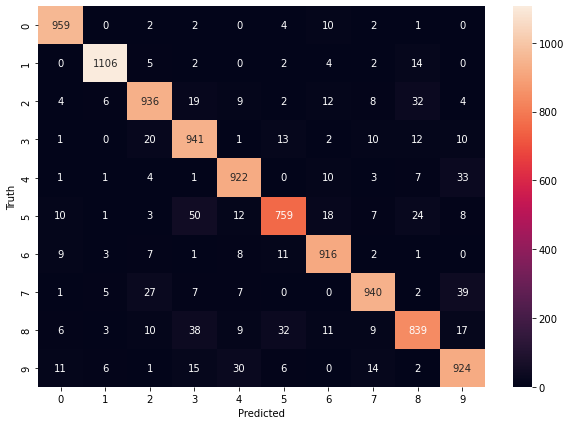

In [106]:
#use seaborn library to show how confusion matrix looks like (confusion matrix shows predictions of digits)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [108]:
model=keras.Sequential([ #sequential will create stack of layerr
    keras.layers.Dense(100,input_shape=(784,),activation='relu'), #add the hidden layers
    keras.layers.Dense(10,activation='sigmoid')#using Dense all input nodes will get connected to every output node
]
)
model.compile(
              optimizer='adam',
              loss='sparse_categorical_crossentropy', #sparse means integer no not one hot encoded
              metrics=['accuracy']  
)
model.fit(X_train_flattened,y_train,epochs=5)#here training actually happens

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2767 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1283 - accuracy: 0.9615
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0895 - accuracy: 0.9736
Epoch 4/5
1

In [111]:
model.evaluate(X_test_flattened,y_test) #with hidden layer accuracy improves

313/313 [==============================] - 0s 1ms/step - loss: 0.0905 - accuracy: 0.9737


[0.09053580462932587, 0.9736999869346619]

Text(69.0, 0.5, 'Truth')

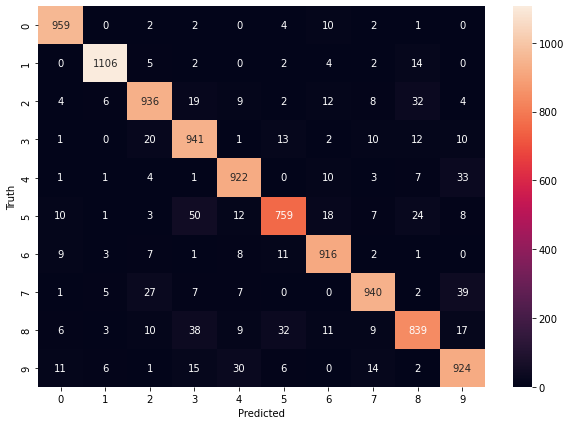

In [112]:
#use seaborn library to show how confusion matrix looks like (confusion matrix shows predictions of digits)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [115]:
#use flatten layer directly without creating array
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),  #sequential will create stack of layerr
    keras.layers.Dense(100,activation='relu'), #add the hidden layers
    keras.layers.Dense(10,activation='sigmoid')#using Dense all input nodes will get connected to every output node
]
)
model.compile(
              optimizer='adam',
              loss='sparse_categorical_crossentropy', #sparse means integer no not one hot encoded
              metrics=['accuracy']  
)
model.fit(X_train,y_train,epochs=5)#here training actually happens

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2698 - accuracy: 0.9238
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1176 - accuracy: 0.9655
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0834 - accuracy: 0.9752
Epoch 4/5
1